<a href="https://colab.research.google.com/github/akshitsehgal/Submission_task/blob/main/OckyPocky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook I've performed cleaning, clustering and analysis on a given dataset


## Step1

### Data Cleaning
- Removing features which won't contribute to clustering
- Dropping uneccessary columns and Converting Object varibales such as income to float64
- Scaling the data so that we can use it for clustering

### Clustering
- Since we have both numerical and categorical data we will use KPrototypes clustering technique
- Kprototypes is a mixture of Kmeans and Kmodes algorithms
- We will calculate the the cost of cost score, aka the sum distance of all points from their respective cluster centroids. We will then plot it on a graph vs to K values and using the Elbow method we will find the optimal K value
- After finding the K will we fit on the the K clusters and add the cluster column to our dataset

## Step 2

We will perform some analysis, like finding the mean of each feature of each cluster, getting the vlaue counts of clusters etc. to analyse the data and our best customers

## Step 3 

In step 3 we will answer the given questions in the task by doing some descriptive analytics

- If a user has done more higher education does he spend more?

- Users who have kids at home are likely to spend more money in gold?

- How much is the impact of marital status of a user impact in spending on wine?  



### Installing Necessary libraries

In [418]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [419]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [420]:
from kmodes.kprototypes import KPrototypes 

In [451]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from kneed import KneeLocator
from tqdm import tqdm
import numpy as np
%matplotlib inline



In [461]:
database = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/OckyPocky/datasheet.csv')
df = database.copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalMntSpent
0,2079,1947,2n Cycle,Married,"₹81,044.00",0,0,27-12-2013,0,450,...,0,0,0,0,0,0,3,11,0,1208
1,2285,1954,Master,Together,"₹36,634.00",0,1,28-05-2013,0,213,...,0,0,0,0,0,0,3,11,0,335
2,4047,1954,PhD,Married,"₹65,324.00",0,1,11-01-2014,0,384,...,0,0,0,0,0,0,3,11,0,544
3,4073,1954,2n Cycle,Married,"₹63,564.00",0,0,29-01-2014,0,769,...,1,0,0,0,0,0,3,11,1,1215
4,9477,1954,PhD,Married,"₹65,324.00",0,1,11-01-2014,0,384,...,0,0,0,0,0,0,3,11,0,544


In [462]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'TotalMntSpent'],
      dtype='object')

In [463]:

df[df.dtypes[df.dtypes!='object'].index].describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalMntSpent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,605.798214
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,602.249288
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,68.750000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,396.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1045.500000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2525.000000


In [464]:
df.isnull().values.sum()

24

In [465]:
# Checking the different data types present in our data
df.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Complain                int64
Z_CostContact           int64
Z_Revenue               int64
Response                int64
TotalMntSpent           int64
dtype: object

## Data cleaning

In [466]:
# Converting date of birth to age
age = []
for i in list(df['Year_Birth']):
  age.append(2022-i)
df['age'] = age

In [467]:
# Dropping columns which won't help us in clustering segmentation
df.drop('Year_Birth', axis=1,inplace=True)
df.drop('ID',axis=1,inplace=True)
df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [468]:
# Converting income from object to float
df['Income'] = df['Income'].replace(['₹',','],'',regex=True).astype(float)
df_main = df.copy()
df



,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalMntSpent,age
0,2n Cycle,Married,81044.0,0,0,27-12-2013,0,450,26,535,...,5,6,10,1,0,0,0,0,1208,75
1,Master,Together,36634.0,0,1,28-05-2013,0,213,9,76,...,5,2,5,7,0,0,0,0,335,68
2,PhD,Married,65324.0,0,1,11-01-2014,0,384,0,102,...,6,2,9,4,0,0,0,0,544,68
3,2n Cycle,Married,63564.0,0,0,29-01-2014,0,769,80,252,...,10,10,7,6,0,0,0,1,1215,68
4,PhD,Married,65324.0,0,1,11-01-2014,0,384,0,102,...,6,2,9,4,0,0,0,0,544,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Divorced,46310.0,1,0,03-12-2012,99,185,2,88,...,6,1,5,8,0,0,0,0,309,46
2236,Graduation,Together,78416.0,0,1,27-06-2014,99,453,38,279,...,7,7,10,3,0,0,0,0,1179,46
2237,PhD,Divorced,66476.0,0,1,07-03-2013,99,372,18,126,...,5,2,11,4,0,0,0,0,689,46
2238,2n Cycle,Married,31056.0,1,0,22-01-2013,99,5,10,13,...,1,0,3,8,0,0,0,0,55,45


## Scaling

In [469]:
num_list = []
for idx,i in enumerate(df.dtypes):
  if i!= 'object':
    num_list.append(df.columns[idx])

num_list


['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'TotalMntSpent',
 'age']

In [470]:
scalar = MinMaxScaler()
scalar.fit(df[num_list])
df[num_list] = scalar.transform(df[num_list])
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalMntSpent,age
0,2n Cycle,Married,0.119281,0.0,0.0,27-12-2013,0.0,0.301407,0.130653,0.310145,...,0.185185,0.214286,0.769231,0.05,0.0,0.0,0.0,0.0,0.477381,0.475728
1,Master,Together,0.052492,0.0,0.5,28-05-2013,0.0,0.142666,0.045226,0.044058,...,0.185185,0.071429,0.384615,0.35,0.0,0.0,0.0,0.0,0.130952,0.407767
2,PhD,Married,0.095639,0.0,0.5,11-01-2014,0.0,0.257200,0.000000,0.059130,...,0.222222,0.071429,0.692308,0.20,0.0,0.0,0.0,0.0,0.213889,0.407767
3,2n Cycle,Married,0.092992,0.0,0.0,29-01-2014,0.0,0.515070,0.402010,0.146087,...,0.370370,0.357143,0.538462,0.30,0.0,0.0,0.0,1.0,0.480159,0.407767
4,PhD,Married,0.095639,0.0,0.5,11-01-2014,0.0,0.257200,0.000000,0.059130,...,0.222222,0.071429,0.692308,0.20,0.0,0.0,0.0,0.0,0.213889,0.407767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Divorced,0.067044,0.5,0.0,03-12-2012,1.0,0.123912,0.010050,0.051014,...,0.222222,0.035714,0.384615,0.40,0.0,0.0,0.0,0.0,0.120635,0.194175
2236,Graduation,Together,0.115328,0.0,0.5,27-06-2014,1.0,0.303416,0.190955,0.161739,...,0.259259,0.250000,0.769231,0.15,0.0,0.0,0.0,0.0,0.465873,0.194175
2237,PhD,Divorced,0.097372,0.0,0.5,07-03-2013,1.0,0.249163,0.090452,0.073043,...,0.185185,0.071429,0.846154,0.20,0.0,0.0,0.0,0.0,0.271429,0.194175
2238,2n Cycle,Married,0.044103,0.5,0.0,22-01-2013,1.0,0.003349,0.050251,0.007536,...,0.037037,0.000000,0.230769,0.40,0.0,0.0,0.0,0.0,0.019841,0.184466


In [471]:
# Fill null values with zero
df.fillna(0)
df.replace(np.nan,0,inplace=True)

In [472]:
df.isnull().values.sum()

0

### Using PCA to convert the multi features into 2D for visualization of segments

In [473]:
pca = PCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(df[num_list]))

In [474]:
transformed

,0,1
0,0.494196,-0.109007
1,-0.181170,-0.000489
2,0.049667,-0.105184
3,0.723412,0.768720
4,0.049667,-0.105184
...,...,...
2235,-0.358632,-0.134485
2236,0.540414,-0.598953
2237,0.188135,-0.516981
2238,-0.531872,-0.072222


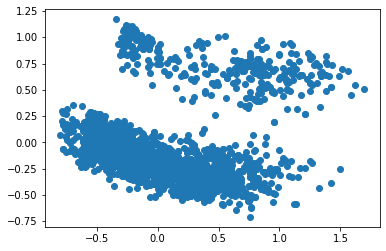

In [475]:
plt.scatter(transformed[transformed.columns[0]],transformed[transformed.columns[1]])

## Apply clustering (K-modes)

In [437]:
categorical_idx = []
for idx,i in enumerate(df.dtypes):
  if i == 'object':
    categorical_idx.append(idx)

categorical_idx

[0, 1, 5]

### Plot elbow plot to get the best value for K

In [438]:
num_columns = list(df.dtypes[df.dtypes!='object'].index)
df_num_columns = df[num_columns]
df_num_columns

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalMntSpent,age
0,0.119281,0.0,0.0,0.0,0.301407,0.130653,0.310145,0.281853,0.372624,0.071823,...,0.185185,0.214286,0.769231,0.05,0.0,0.0,0.0,0.0,0.477381,0.475728
1,0.052492,0.0,0.5,0.0,0.142666,0.045226,0.044058,0.015444,0.011407,0.082873,...,0.185185,0.071429,0.384615,0.35,0.0,0.0,0.0,0.0,0.130952,0.407767
2,0.095639,0.0,0.5,0.0,0.257200,0.000000,0.059130,0.081081,0.121673,0.013812,...,0.222222,0.071429,0.692308,0.20,0.0,0.0,0.0,0.0,0.213889,0.407767
3,0.092992,0.0,0.0,0.0,0.515070,0.402010,0.146087,0.057915,0.129278,0.179558,...,0.370370,0.357143,0.538462,0.30,0.0,0.0,0.0,1.0,0.480159,0.407767
4,0.095639,0.0,0.5,0.0,0.257200,0.000000,0.059130,0.081081,0.121673,0.013812,...,0.222222,0.071429,0.692308,0.20,0.0,0.0,0.0,0.0,0.213889,0.407767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.067044,0.5,0.0,1.0,0.123912,0.010050,0.051014,0.057915,0.019011,0.038674,...,0.222222,0.035714,0.384615,0.40,0.0,0.0,0.0,0.0,0.120635,0.194175
2236,0.115328,0.0,0.5,1.0,0.303416,0.190955,0.161739,0.725869,0.144487,0.505525,...,0.259259,0.250000,0.769231,0.15,0.0,0.0,0.0,0.0,0.465873,0.194175
2237,0.097372,0.0,0.5,1.0,0.249163,0.090452,0.073043,0.181467,0.182510,0.215470,...,0.185185,0.071429,0.846154,0.20,0.0,0.0,0.0,0.0,0.271429,0.194175
2238,0.044103,0.5,0.0,1.0,0.003349,0.050251,0.007536,0.011583,0.030418,0.044199,...,0.037037,0.000000,0.230769,0.40,0.0,0.0,0.0,0.0,0.019841,0.184466


In [439]:
cost_dict = {}
k_range = range(1,7)
for k in k_range:
  kproto = KPrototypes(n_clusters=k, init='Cao', n_jobs = 4,verbose=2)
  res = kproto.fit(df_num_columns,categorical=categorical_idx)
  cost_dict[k] = kproto.cost_

cost_dict

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 1
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 5
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 7
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 10
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 8
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 2


{1: 2187.5419814929196,
 2: 1765.7475616103388,
 3: 1535.9882918275678,
 4: 1441.264939806611,
 5: 1346.8267732096795,
 6: 1276.6877346829287}

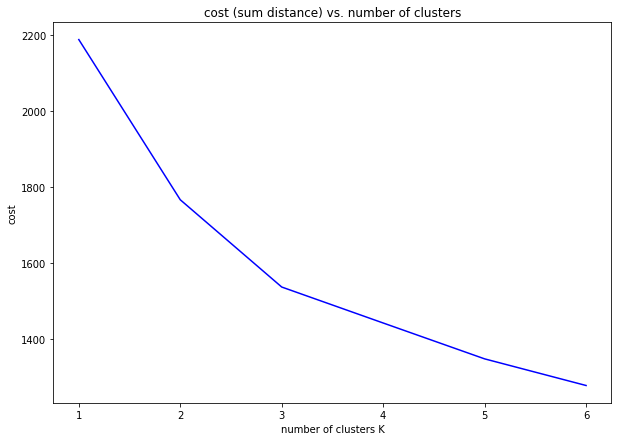

In [440]:
# scree plot: look for elbow
plt.figure(figsize=[10,7])
plt.plot(list(cost_dict.keys()), list(cost_dict.values()), color="blue")
plt.title("cost (sum distance) vs. number of clusters")
plt.xticks(np.arange(1,7,1))
plt.xlabel("number of clusters K")
plt.ylabel("cost");

In [441]:
# Confirm visual clue for the elbow
# KneeLocator class will detect elbows if curve is convex; if concave, will detect knees

cost_knee = KneeLocator(x = list(cost_dict.keys()),
                        y = list(cost_dict.values()),
                        S = 0.1, curve = 'convex',
                        direction = 'decreasing', online = True)
k_cost = cost_knee.elbow
print(f'Elbow at k = {k_cost:.0f} clusters ')

Elbow at k = 3 clusters 


** Note: Using k=5 here since in our earlier plot we used K range from 1 to 20 and optimal K (no of clusters were 5) **

In [442]:
kproto = KPrototypes(n_clusters=5,init = 'Cao', n_jobs = 4, verbose=2)
res2 = kproto.fit(df_num_columns,categorical=categorical_idx)



Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 4


In [443]:
clusters = kproto.predict(df_num_columns,categorical=categorical_idx)
clusters

array([0, 2, 2, ..., 2, 1, 0], dtype=uint16)

In [444]:
df['clusters'] = list(clusters)
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalMntSpent,age,clusters
0,2n Cycle,Married,0.119281,0.0,0.0,27-12-2013,0.0,0.301407,0.130653,0.310145,...,0.214286,0.769231,0.05,0.0,0.0,0.0,0.0,0.477381,0.475728,0
1,Master,Together,0.052492,0.0,0.5,28-05-2013,0.0,0.142666,0.045226,0.044058,...,0.071429,0.384615,0.35,0.0,0.0,0.0,0.0,0.130952,0.407767,2
2,PhD,Married,0.095639,0.0,0.5,11-01-2014,0.0,0.257200,0.000000,0.059130,...,0.071429,0.692308,0.20,0.0,0.0,0.0,0.0,0.213889,0.407767,2
3,2n Cycle,Married,0.092992,0.0,0.0,29-01-2014,0.0,0.515070,0.402010,0.146087,...,0.357143,0.538462,0.30,0.0,0.0,0.0,1.0,0.480159,0.407767,4
4,PhD,Married,0.095639,0.0,0.5,11-01-2014,0.0,0.257200,0.000000,0.059130,...,0.071429,0.692308,0.20,0.0,0.0,0.0,0.0,0.213889,0.407767,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Divorced,0.067044,0.5,0.0,03-12-2012,1.0,0.123912,0.010050,0.051014,...,0.035714,0.384615,0.40,0.0,0.0,0.0,0.0,0.120635,0.194175,1
2236,Graduation,Together,0.115328,0.0,0.5,27-06-2014,1.0,0.303416,0.190955,0.161739,...,0.250000,0.769231,0.15,0.0,0.0,0.0,0.0,0.465873,0.194175,0
2237,PhD,Divorced,0.097372,0.0,0.5,07-03-2013,1.0,0.249163,0.090452,0.073043,...,0.071429,0.846154,0.20,0.0,0.0,0.0,0.0,0.271429,0.194175,2
2238,2n Cycle,Married,0.044103,0.5,0.0,22-01-2013,1.0,0.003349,0.050251,0.007536,...,0.000000,0.230769,0.40,0.0,0.0,0.0,0.0,0.019841,0.184466,1


In [445]:
df[df['clusters']==0]

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalMntSpent,age,clusters
0,2n Cycle,Married,0.119281,0.0,0.0,27-12-2013,0.000000,0.301407,0.130653,0.310145,...,0.214286,0.769231,0.05,0.0,0.0,0.0,0.0,0.477381,0.475728,0
28,Master,Married,0.098146,0.0,0.0,11-09-2012,0.010101,0.332217,0.180905,0.266667,...,0.285714,0.461538,0.15,0.0,0.0,0.0,0.0,0.495238,0.407767,0
36,Graduation,Married,0.089609,0.0,0.5,25-04-2013,0.010101,0.253182,0.000000,0.109565,...,0.178571,0.923077,0.15,0.0,0.0,0.0,0.0,0.398016,0.271845,0
44,Graduation,Single,0.107439,0.0,0.0,31-05-2014,0.010101,0.123242,0.874372,0.148406,...,0.142857,0.461538,0.10,0.0,0.0,0.0,0.0,0.286111,0.203883,0
47,2n Cycle,Married,0.095708,0.0,0.0,01-08-2013,0.010101,0.047555,0.110553,0.064928,...,0.107143,1.000000,0.05,0.0,0.0,0.0,0.0,0.180952,0.116505,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,Graduation,Divorced,0.120270,0.0,0.0,23-09-2012,0.989899,0.377093,0.251256,0.448696,...,0.250000,0.923077,0.15,0.0,0.0,0.0,0.0,0.646032,0.155340,0
2221,PhD,Together,0.098119,0.0,0.0,17-05-2013,0.989899,0.312123,0.110553,0.250435,...,0.250000,0.923077,0.15,0.0,0.0,0.0,0.0,0.506746,0.067961,0
2232,Graduation,Single,0.102249,0.0,0.0,26-05-2014,1.000000,0.182853,0.432161,0.120580,...,0.107143,0.384615,0.05,0.0,0.0,0.0,0.0,0.315873,0.213592,0
2236,Graduation,Together,0.115328,0.0,0.5,27-06-2014,1.000000,0.303416,0.190955,0.161739,...,0.250000,0.769231,0.15,0.0,0.0,0.0,0.0,0.465873,0.194175,0


In [477]:
database['clusters'] = list(clusters)
df_main['clusters'] = list(clusters)


# Analysis on clusters

- First we will find tha value counts of each cluster
- A good indication of the distribution of data is the mean value, hence will find the average value for each of the variables and in each cluster.


In [447]:
# Get the counts of each cluster
df.clusters.value_counts()

1    823
2    556
0    468
4    255
3    138
Name: clusters, dtype: int64

In [478]:
df_main.groupby('clusters').apply(np.mean).T

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


clusters,0,1,2,3,4
Income,71314.051502,34747.982759,54444.981718,79545.226277,53752.354331
Kidhome,0.081197,0.882139,0.205036,0.050725,0.431373
Teenhome,0.309829,0.335358,1.077338,0.166667,0.356863
Recency,51.418803,51.529769,51.091727,46.398551,34.203922
MntWines,557.017094,39.948967,318.651079,771.123188,406.545098
MntFruits,61.912393,5.748481,16.000000,57.818841,32.690196
MntMeatProducts,377.876068,25.460510,93.244604,448.985507,244.564706
MntFishProducts,94.068376,7.986634,17.539568,95.123188,41.494118
MntSweetProducts,63.177350,6.298906,15.586331,67.239130,31.078431
MntGoldProds,74.461538,16.364520,45.075540,79.369565,55.992157


In [489]:
df_main.groupby("clusters").agg({"Education": lambda x: x.value_counts()})

,Education
clusters,
0,"[252, 98, 71, 45, 2]"
1,"[414, 143, 124, 95, 47]"
2,"[272, 137, 110, 34, 3]"
3,"[78, 28, 18, 14]"
4,"[111, 80, 47, 15, 2]"


## Results of analysis on clusters

From the above table we can make the following interpretations:

- Total amount spent on average is the highest for cluster 3 followed by cluster 0
- Income of people (on an average) belonging cluster 3 and cluster 0 are also the highest
-  Cluster 1 and 2 have highest value counts
-  Cluster 3 have the least complaints out of all clusters

Based on the above interpretations we can say that People belonging to cluster 3 and 0, having a high income, having less complaints and are graduates are among the best customers for the comapany

## If a user has done more higher education does he spend more?

- We first take out the mean and other useful descriptors of Total amount spent by each of the unique Education types
- We then combine all of them it in a table and plot it on a horizontal bar graph graph for visibility

In [370]:
database['Education'].unique()

array(['2n Cycle', 'Master', 'PhD', 'Graduation', 'Basic'], dtype=object)

In [490]:
df_phd = database[database['Education']=='PhD']
df_phd = df_phd[['Education','TotalMntSpent']]




In [492]:
df_basic = database[database['Education']=='Basic']
df_basic = df_basic[['Education','TotalMntSpent']]



In [493]:
df_cycle = database.loc[database['Education']=='2n Cycle']
df_cycle = df_cycle[['Education','TotalMntSpent']]


In [494]:
df_master = database.loc[database['Education']=='Master']
df_master = df_master[['Education','TotalMntSpent']]


In [495]:
df_graduation = database.loc[database['Education']=='Graduation']
df_graduation = df_graduation[['Education','TotalMntSpent']]



In [496]:
df_education = pd.concat([df_basic.describe().rename(columns = {'TotalMntSpent': 'Basic'}),
                          df_graduation.describe().rename(columns = {'TotalMntSpent': 'Graduation'}),
                          df_master.describe().rename(columns = {'TotalMntSpent': 'Master'}),
                          df_cycle.describe().rename(columns = {'TotalMntSpent': '2n-Cycle'}),
                          df_phd.describe().rename(columns = {'TotalMntSpent': 'Phd'})],axis=1)

### Results

*As per the analysis performed it is being interpertated that people with a higher degree are more likely to spend more or according to the given data on an average people with higher degrees spent more*

In [497]:
df_education = df_education.T
df_education

,count,mean,std,min,25%,50%,75%,max
Basic,54.0,81.796296,123.227260,14.0,29.75,57.0,80.0,839.0
Graduation,1127.0,619.898846,599.525914,5.0,70.00,414.0,1073.0,2524.0
Master,370.0,611.781081,623.393157,10.0,79.25,387.5,988.0,2525.0
2n-Cycle,203.0,496.527094,542.353099,13.0,56.50,198.0,899.0,2257.0
Phd,486.0,672.409465,616.119130,8.0,88.50,493.0,1157.5,2440.0


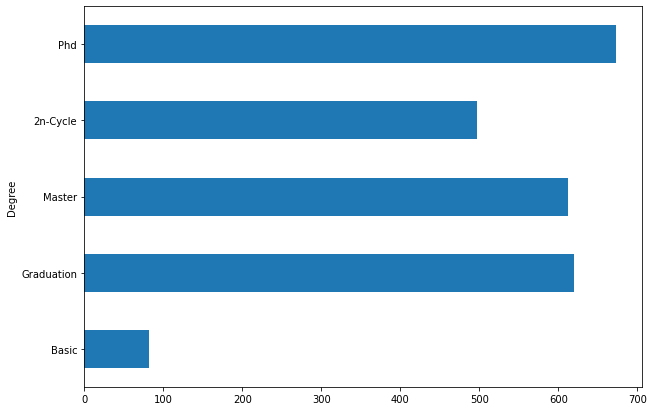

In [510]:
df_education['mean'].plot.barh(xlabel='Degree',figsize=(10,7));

## Users who have kids at home are likely to spend more money in gold?


- We first take out the mean and other useful descriptors of amount spent on Gold by each of the no. of kids people have
- We then combine all of them it in a table and plot it on a horizontal bar graph for visibility

In [399]:
database['Kidhome'].unique()

array([0, 1, 2])

In [499]:
df_kid0 = database[database['Kidhome']==0]
df_kid0 = df_kid0[['MntGoldProds']]


In [500]:
df_kid1 = database[database['Kidhome']==1]
df_kid1 = df_kid1[['MntGoldProds']]


In [501]:
df_kid2 = database[database['Kidhome']==2]
df_kid2 = df_kid2[['MntGoldProds']]


### Results

From the given data and analysis it shown in graph is is safe to conclude that more kids people have the less they spend on Gold

In [403]:
df_kids = pd.concat([df_kid0.describe().rename(columns = {'MntGoldProds': '0'}),
                          df_kid1.describe().rename(columns = {'MntGoldProds': '1'}),
                          df_kid2.describe().rename(columns = {'MntGoldProds': '2'})],axis=1)
df_kids = df_kids.T
df_kids


,count,mean,std,min,25%,50%,75%,max
0,1293.0,60.037123,58.345428,0.0,17.0,39.0,86.0,321.0
1,899.0,22.408231,31.188899,0.0,5.0,12.0,27.0,362.0
2,48.0,17.416667,27.670426,0.0,2.0,8.5,24.5,176.0


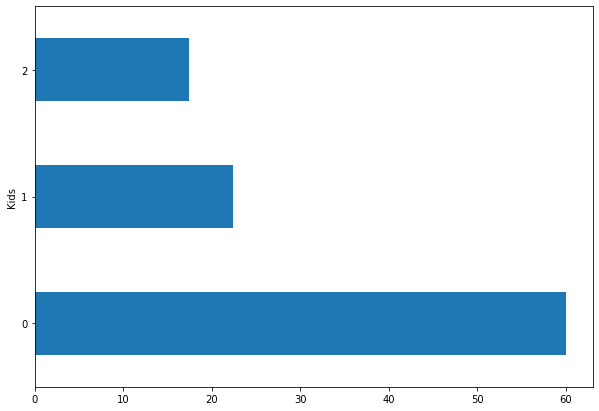

In [404]:
df_kids['mean'].plot(kind = 'barh',xlabel = 'Kids', ylabel='Kids',figsize=(10,7))

## How much is the impact of marital status of a user impact in spending on wine?


- Like the above two examples we agains first take out the mean and other useful descriptors of amount speny on wine by every unique martial status present in the dataset
- We then combine all of them in a table and plot it on a horizontal graph for visibility

In [405]:
marital_list = list(database['Marital_Status'].unique())
marital_list

['Married',
 'Together',
 'Single',
 'Divorced',
 'Widow',
 'YOLO',
 'Alone',
 'Absurd']

In [502]:
df_married = database[database['Marital_Status']=='Married']
df_married = df_married[['MntWines']]


In [504]:
df_together= database[database['Marital_Status']=='Together']
df_together = df_together[['MntWines']]


In [503]:
df_single = database[database['Marital_Status']=='Single']
df_single = df_single[['MntWines']]


In [505]:
df_divorced = database[database['Marital_Status']=='Divorced']
df_divorced = df_together[['MntWines']]


In [506]:
df_widow = database[database['Marital_Status']=='Widow']
df_widow = df_widow[['MntWines']]


In [507]:
df_yolo = database[database['Marital_Status']=='Yolo']
df_yolo = df_yolo[['MntWines']]


In [508]:
df_alone = database[database['Marital_Status']=='Alone']
df_alone = df_alone[['MntWines']]


In [509]:
df_absurd = database[database['Marital_Status']=='Absurd']
df_absurd = df_absurd[['MntWines']]


### Results

According to the data and analysis perfomed we conclude:

- People with martial status of "widow" and "Absurd" spent the most on wine on a average with Widow being the highest
- Married people have the highest count in dataset among all other marital statuses andon an average married people spent almost 300 on Wine in last two years
- "Alone" people spent the least on Wine
- "Alone" and "Absurd" have a very low count in the dataset with only 3 and 2 entries repectively 


In [414]:
df_marital_status = pd.concat([df_married.describe().rename(columns = {'MntWines': 'Married'}),
                          df_together.describe().rename(columns = {'MntWines': 'Together'}),
                          df_single.describe().rename(columns = {'MntWines': 'Single'}),
                          df_divorced.describe().rename(columns = {'MntWines': 'Divorced'}),
                          df_widow.describe().rename(columns = {'MntWines': 'Widow'}),
                          df_yolo.describe().rename(columns = {'MntWines': 'YOlo'}),
                          df_alone.describe().rename(columns = {'MntWines': 'Alone'}),
                          df_absurd.describe().rename(columns = {'MntWines': 'Absurd'})],axis=1)
df_marital_status = df_marital_status.T
df_marital_status


,count,mean,std,min,25%,50%,75%,max
Married,864.0,299.480324,337.982007,0.0,23.00,173.0,483.00,1493.0
Together,580.0,306.825862,334.562564,0.0,25.75,183.5,505.00,1492.0
Single,480.0,288.331250,333.111329,0.0,20.00,153.5,480.75,1332.0
Divorced,580.0,306.825862,334.562564,0.0,25.75,183.5,505.00,1492.0
Widow,77.0,369.272727,333.919059,1.0,67.00,332.0,544.00,1462.0
YOlo,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alone,3.0,184.666667,302.572856,5.0,10.00,15.0,274.50,534.0
Absurd,2.0,355.500000,163.341666,240.0,297.75,355.5,413.25,471.0


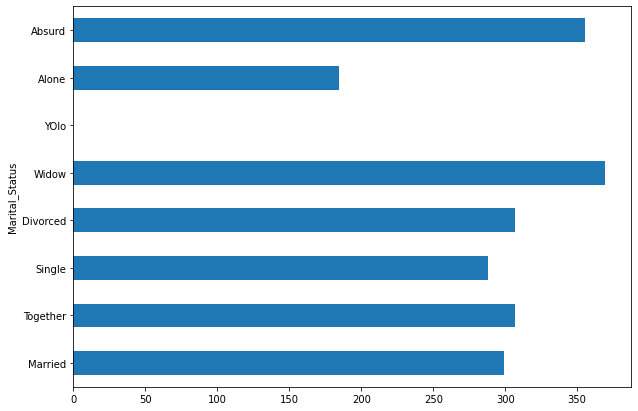

In [415]:
df_marital_status['mean'].plot(kind = 'barh',xlabel = 'Marital_Status', ylabel='Amount spen on Wine',figsize=(10,7))